<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone/Capstone_MBA_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Market Basket Analysis to determine the typical combinations of ICD Categories per Claim**

# Import libraries and load dataset

In [1]:
# Importing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load claims breakdown by diagnosis
clm_icd = pd.read_csv('/content/CLM Breakdown csv.csv')

In [3]:
# Load ICD table to get ICD category
icd_table = pd.read_excel('/content/icd_table.xlsx')

# Data Prep
Profiling, Cleaning

In [4]:
clm_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382438 entries, 0 to 382437
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 35.0+ MB


In [5]:
# Check number of claims
clm_icd['claimcode'].nunique()

166993

In [6]:
icd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icdno        4343 non-null   int64 
 1   icdcategory  4343 non-null   int64 
 2   icdgroup     4343 non-null   int64 
 3   ICD CODE     4343 non-null   object
 4   ICD DISEASE  4343 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.8+ KB


In [7]:
# Creating basket of claims by merging claims table and icd category table
claims = pd.merge(clm_icd, icd_table, on='icdno', how='left')

In [8]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382438 entries, 0 to 382437
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
 12  icdcategory    382355 non-null  float64
 13  icdgroup       382355 non-null  float64
 14  ICD CODE       382355 non-null  object 
 15  ICD DISEASE    382355 non-null  object 
dtypes: float64(7), int64(6), object(3)
memory usage: 49.6+ MB


In [9]:
claims.isnull().sum()

cbdcode           0
claimcode         0
icdno             0
doctorcode        0
cptno             0
sacode            0
UNIT AMT          0
QTY               0
INCURRED AMT      0
HOSP BILL AMT     0
COVERED AMT       0
BILL TO           0
icdcategory      83
icdgroup         83
ICD CODE         83
ICD DISEASE      83
dtype: int64

In [10]:
null_icd = claims[claims['icdcategory'].isnull()]
null_icd['claimcode'].nunique()

46

**46 claims do not have an ICD category**

In [11]:
# Drop null values
claims = claims.dropna()
claims.isnull().sum()

cbdcode          0
claimcode        0
icdno            0
doctorcode       0
cptno            0
sacode           0
UNIT AMT         0
QTY              0
INCURRED AMT     0
HOSP BILL AMT    0
COVERED AMT      0
BILL TO          0
icdcategory      0
icdgroup         0
ICD CODE         0
ICD DISEASE      0
dtype: int64

In [12]:
# Convert Claim code and ICD Category into categorical data
claims['claimcode'] = claims['claimcode'].astype(str)
claims['icdcategory'] = claims['icdcategory'].astype(int).astype(str)

In [13]:
# Drop other columns
claims = claims[['claimcode','icdno','icdcategory','ICD CODE','ICD DISEASE','sacode']]
claims.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy,3718
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954


In [14]:
# Check claim with duplicate ICD category 
claims[claims['claimcode']=='203913']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954
5,203913,40054,261,W55,Contact with other mammals,3843
6,203913,40054,261,W55,Contact with other mammals,3726


In [15]:
# Check number of unique ICD categories in claims
claims['icdcategory'].nunique()

241

In [16]:
241/290

0.8310344827586207

**241 out of 290 or 83% of ICD categories are present in the claims.**

In [17]:
# Removing duplicate ICD categories in claims, since we are only looking at the occurance of the ICD category per claim
claims['claims_icd'] = claims[['claimcode', 'icdcategory']].agg('_'.join, axis=1)
claims_icd = claims.drop_duplicates(subset='claims_icd')

In [18]:
claims['icdcategory'].nunique()

241

In [19]:
claims_icd[claims_icd['icdcategory']=='0']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
120,208601,77693,0,A09.1,AGE WITH MOD./MARKED DHN,3812,208601_0
723,212928,77693,0,A09.1,AGE WITH MOD./MARKED DHN,3747,212928_0
1068,213902,77689,0,1,LACK OF DOCUMENTS,3718,213902_0
1358,214385,77771,0,I10.0,HPN STAGE I,3718,214385_0
1516,214739,77695,0,A09.3,AGE WITH NO SIGNS OF DHN,3747,214739_0
...,...,...,...,...,...,...,...
382205,602217,77782,0,U07.1,"COVID-19, virus identified",3718,602217_0
382208,602620,77771,0,I10.0,HPN STAGE I,3816,602620_0
382233,607092,77782,0,U07.1,"COVID-19, virus identified",3747,607092_0
382308,616034,77771,0,I10.0,HPN STAGE I,3718,616034_0


In [20]:
# Dropping ICD Category 0
claims_icd = claims_icd[claims_icd.icdcategory != '0']
claims_icd[claims_icd['icdcategory']=='0']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd


In [21]:
# Checking number of ICD categories per claim
claims_icd['claimcode'].value_counts().sort_values(ascending=False)

305146    10
309069    10
328555    10
355547     9
377387     9
          ..
453359     1
453361     1
453363     1
453376     1
658022     1
Name: claimcode, Length: 161973, dtype: int64

In [22]:
claims_icd[claims_icd['claimcode']=='328555']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
201183,328555,12785,130,K76.0,"Fatty (change of) liver, not elsewhere classified",3807,328555_130
201184,328555,46010,158,M81.9,"Osteoporosis, unspecified",3803,328555_158
201186,328555,25106,216,R80.9,"Proteinuria, unspecified",3808,328555_216
201188,328555,3857,54,E11,Type 2 diabetes mellitus,3803,328555_54
201189,328555,14648,144,M06.9,"Rheumatoid arthritis, unspecified",3800,328555_144
201190,328555,4467,61,E87.8,Other disorders of electrolyte and fluid balan...,3803,328555_61
201191,328555,3639,53,E03.9,"Hypothyroidism, unspecified",3806,328555_53
201192,328555,20895,167,N20.9,"Urinary calculus, unspecified",3978,328555_167
201193,328555,10140,105,I25.1,Atherosclerotic heart disease of native corona...,3853,328555_105
201195,328555,10341,107,I49.9,"Cardiac arrhythmia, unspecified",3816,328555_107


In [23]:
# Considering only claims with 2 or more ICD categories
claims_icdcombo = claims_icd.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]>1)
claims_icdcombo['claimcode'].value_counts().sum()

37304

In [24]:
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
7815,220945,11745,113,J18.9,"Pneumonia, unspecified organism",1196,220945_113
7822,220945,21009,169,N39.0,"Urinary tract infection, site not specified",3812,220945_169
7828,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,3952,220946_104
7829,220946,3857,54,E11,Type 2 diabetes mellitus,4020,220946_54
7831,220946,11745,113,J18.9,"Pneumonia, unspecified organism",3712,220946_113


In [25]:
37304/166993

0.22338660901953974

**37,304 out of 166,993 or 22% of the claims has 2 or more ICD categories.**

## Preparing Transaction List

In [26]:
# Get list ICD Categories by Claim number
transactions = claims_icdcombo.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD CODE,ICD DISEASE,claims_icd
0,220945,"113,169","J18.9,N39.0","Pneumonia, unspecified organism,Urinary tract ...","220945_113,220945_169"
1,220946,"104,54,113","I10.9,E11,J18.9",Essential Hypertension; malignant hypertension...,"220946_104,220946_54,220946_113"
2,230470,"53,54,105","E03.9,E11,I25.0","Hypothyroidism, unspecified,Type 2 diabetes me...","230470_53,230470_54,230470_105"
3,232051,"169,53,104","N39.0,E05.9,I11.9","Urinary tract infection, site not specified,Th...","232051_169,232051_53,232051_104"
4,251715,"54,104","E11,I10.9","Type 2 diabetes mellitus,Essential Hypertensio...","251715_54,251715_104"


In [27]:
transactions['icd'] = transactions['icdcategory'].apply(lambda t: t.split(','))
transactions = transactions['icd']
transactions.head()

0        [113, 169]
1    [104, 54, 113]
2     [53, 54, 105]
3    [169, 53, 104]
4         [54, 104]
Name: icd, dtype: object

In [28]:
transaction_list = list(transactions)
transaction_list[:30]

[['113', '169'],
 ['104', '54', '113'],
 ['53', '54', '105'],
 ['169', '53', '104'],
 ['54', '104'],
 ['97', '100'],
 ['166', '104'],
 ['61', '131'],
 ['104', '55'],
 ['104', '54'],
 ['15', '169'],
 ['113', '55', '53'],
 ['104', '61'],
 ['105', '54'],
 ['108', '170'],
 ['284', '139'],
 ['48', '104'],
 ['104', '55'],
 ['53', '55'],
 ['104', '53'],
 ['104', '61'],
 ['169', '112'],
 ['108', '104'],
 ['104', '55'],
 ['130', '21', '54', '42', '105', '171', '124'],
 ['112', '105'],
 ['39', '171'],
 ['61', '53', '173', '131', '214', '168'],
 ['53', '105', '152', '61'],
 ['152', '105']]

## One Hot Encoding

In [29]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transaction_list)

# One-hot encode transactions
onehot = encoder.transform(transaction_list)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,1,10,100,102,103,104,105,106,107,108,...,87,88,89,90,91,93,95,97,98,99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13873,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13874,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
13875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# MBA - Diagnosis that are claimed together

##Apriori

In [30]:
# Choose max_len
claims_icdcombo['claimcode'].value_counts().describe()

count    13878.000000
mean         2.687995
std          1.018211
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: claimcode, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Claims')

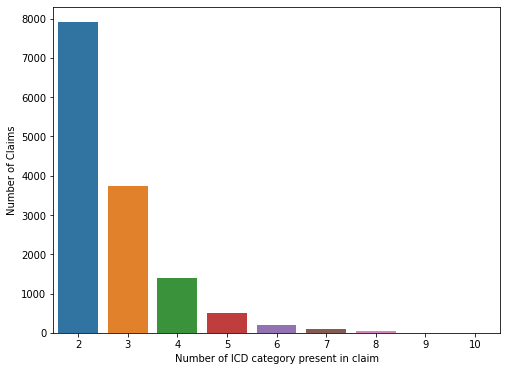

In [31]:
icd_count = pd.DataFrame(claims_icdcombo['claimcode'].value_counts())
plt.figure(figsize=(8,6))
ax = sns.countplot('claimcode', data=icd_count)
ax.set_xlabel('Number of ICD category present in claim')
ax.set_ylabel('Number of Claims')

Text(0, 0.5, 'Number of ICD category present in claim')

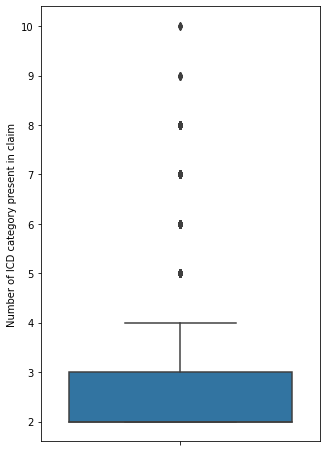

In [32]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(y='claimcode', data=icd_count)
ax.set_ylabel('Number of ICD category present in claim')

We will choose max length of 3.

In [33]:
from mlxtend.frequent_patterns import apriori

# Getting all combinations of item sets
frequent_itemsets = apriori(onehot, 
                            min_support = 0, 
                            max_len = 3, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

,support,itemsets,length
147,0.428376,(61),1
5,0.408632,(104),1
141,0.236922,(54),1
142,0.225897,(55),1
1164,0.153480,"(61, 104)",2


**Min support is 0 for frequent_itemsets**

##Apriori results pruning

### Association Rule #1 - Confidence

In [34]:
from mlxtend.frequent_patterns import association_rules

# Get frequent item sets with minimum support 0.001
frequent_itemsets1 = apriori(onehot, 
                            min_support = 0.001, 
                            max_len = 3, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

rules_1 = association_rules(frequent_itemsets1, 
                          metric = "confidence", 
                         	min_threshold = 0.65).sort_values('confidence',ascending=False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,"(112, 171)",(54),0.001153,0.236922,0.001009,0.875000,3.693203,0.000736,6.104626
7,"(48, 215)",(61),0.003963,0.428376,0.003315,0.836364,1.952406,0.001617,3.493259
21,"(116, 130)",(61),0.001225,0.428376,0.001009,0.823529,1.922446,0.000484,3.239204
13,"(215, 144)",(61),0.002018,0.428376,0.001657,0.821429,1.917542,0.000793,3.201095
14,"(168, 130)",(61),0.002018,0.428376,0.001585,0.785714,1.834170,0.000721,2.667579
1,"(215, 130)",(61),0.016069,0.428376,0.012610,0.784753,1.831927,0.005726,2.655671
3,"(215, 169)",(61),0.006989,0.428376,0.005476,0.783505,1.829013,0.002482,2.640359
11,"(215, 131)",(61),0.002882,0.428376,0.002234,0.775000,1.809159,0.000999,2.540552
4,"(215, 170)",(61),0.006197,0.428376,0.004684,0.755814,1.764371,0.002029,2.340937
9,"(167, 215)",(61),0.004468,0.428376,0.003315,0.741935,1.731973,0.001401,2.215044


In [35]:
# Checking ICD Category #61
icd_categories = pd.read_csv('/content/icd_category_categorydes.csv')
icd_categories[icd_categories['icdcategory']==61]

,icdcategory,ICD CATEGORY
60,61,Metabolic disorders (E70-E88)


Metabolic disorders is a frequent consequent ICD

### Association Rule #2 - Zhang (trial from DataCamp)

**Zhang's rule**

In [36]:
# Define a new zhang's metric function
def zhangs_rule(rules):
	PAB = rules['support'].copy()
	PA = rules['antecedent support'].copy()
	PB = rules['consequent support'].copy()
	NUMERATOR = PAB - PA*PB
	DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
	return NUMERATOR / DENOMINATOR

In [37]:
# Generate the initial set of rules using a minimum lift of 1.00 on frequent_itemsets (all combinations)
rules_2 = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

# Set antecedent support to 0.01
rules_2 = rules_2[rules_2['antecedent support'] > 0.01]

# Set consequent support to 0.01
rules_2 = rules_2[rules_2['consequent support'] > 0.01]

# Compute Zhang's rule
rules_2['zhang'] = zhangs_rule(rules_2)

# Set the lower bound for Zhang's rule to 0.8
rules_2 = rules_2[rules_2['zhang'] > 0.8].sort_values('zhang',ascending=False)
rules_2

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/association_rules.py:105: RuntimeWarning: invalid value encountered in double_scalars
  "confidence": lambda sAC, sA, _: sAC/sA,
/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/association_rules.py:106: RuntimeWarning: invalid value encountered in double_scalars
  "lift": lambda sAC, sA, sC: metric_dict["confidence"](sAC, sA, sC)/sC,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
271,(10),(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
270,(15),(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
521,(173),(172),0.017222,0.010304,0.002522,0.146444,14.212189,0.002345,1.159497,0.945928
520,(172),(173),0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
123,(169),(15),0.128116,0.014844,0.008503,0.066367,4.471054,0.006601,1.055186,0.890416
361,(171),(173),0.027165,0.017222,0.003459,0.127321,7.393139,0.002991,1.126163,0.888886
360,(173),(171),0.017222,0.027165,0.003459,0.200837,7.393139,0.002991,1.217317,0.879893
949,(10),(1),0.018158,0.011529,0.001441,0.079365,6.883929,0.001232,1.073684,0.870542
948,(1),(10),0.011529,0.018158,0.001441,0.125000,6.883929,0.001232,1.122105,0.864703
823,(171),(172),0.027165,0.010304,0.001729,0.063660,6.178183,0.001449,1.056984,0.861544


### Association Rule #3 - Multiple Metrics (trial from DataCamp)

In [38]:
# Recover association rules using a minium support threshold of 0.001
rules_3 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_3['zhang'] = zhangs_rule(rules_3)

# Apply metric thresholds
rules_3 = rules_3[(rules_3['antecedent support'] > 0.002) &
                       (rules_3['consequent support'] > 0.01) &
                       (rules_3['lift'] > 2.50) &
                       (rules_3['zhang'] > 0.80)] 

# Print remaining rule
rules_3.sort_values('support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
253,(169),(15),0.128116,0.014844,0.008503,0.066367,4.471054,0.006601,1.055186,0.890416
552,(15),(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
553,(10),(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
690,(173),(171),0.017222,0.027165,0.003459,0.200837,7.393139,0.002991,1.217317,0.879893
691,(171),(173),0.027165,0.017222,0.003459,0.127321,7.393139,0.002991,1.126163,0.888886
834,(42),(171),0.009728,0.027165,0.002882,0.296296,10.907162,0.002618,1.382449,0.917240
935,(112),"(54, 105)",0.026733,0.020752,0.002522,0.094340,4.545991,0.001967,1.081253,0.801451
952,(172),(173),0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
953,(173),(172),0.017222,0.010304,0.002522,0.146444,14.212189,0.002345,1.159497,0.945928
1022,(112),"(53, 130)",0.026733,0.019167,0.002378,0.088949,4.640719,0.001865,1.076595,0.806065


### Association Rule #4 - Lift & Zhang

In [39]:
# Recover association rules using a minium support threshold of 0.001
rules_4 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_4['zhang'] = zhangs_rule(rules_4)

# Apply metric thresholds
rules_4 = rules_4[(rules_4['lift'] > 1.00) &
                  (rules_4['zhang'] > 0.50)] 

# Print remaining rule
rules_4.sort_values('zhang',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1078,(156),(224),0.010592,0.007422,0.002306,0.217687,29.330691,0.002227,1.268774,0.976247
2305,(112),"(1, 105)",0.026733,0.001946,0.001009,0.037736,19.396226,0.000957,1.037194,0.974495
1079,(224),(156),0.007422,0.010592,0.002306,0.310680,29.330691,0.002227,1.435338,0.973128
1495,(156),(152),0.010592,0.007278,0.001657,0.156463,21.498889,0.001580,1.176856,0.963694
2307,(105),"(1, 112)",0.099222,0.001369,0.001009,0.010167,7.426213,0.000873,1.008888,0.960660
...,...,...,...,...,...,...,...,...,...,...
2141,(215),"(112, 104)",0.081640,0.007134,0.001081,0.013239,1.855893,0.000498,1.006188,0.502173
2362,(112),"(54, 169)",0.026733,0.019311,0.001009,0.037736,1.954097,0.000493,1.019147,0.501666
1174,"(167, 130)",(215),0.013403,0.081640,0.002162,0.161290,1.975629,0.001068,1.094968,0.500540
288,(61),"(53, 215)",0.428376,0.012250,0.007350,0.017157,1.400639,0.002102,1.004993,0.500399


### Association Rule #5 - Confidence & Zhang


In [40]:
# Recover association rules using a minium support threshold of 0.001
rules_5 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_5['zhang'] = zhangs_rule(rules_5)

# Apply metric thresholds
rules_5 = rules_5[(rules_5['confidence'] > 0.20) &
                  (rules_5['zhang'] > 0.80)] 

# Print remaining rule
rules_5.sort_values('zhang',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1078,(156),(224),0.010592,0.007422,0.002306,0.217687,29.330691,0.002227,1.268774,0.976247
1079,(224),(156),0.007422,0.010592,0.002306,0.310680,29.330691,0.002227,1.435338,0.973128
1494,(152),(156),0.007278,0.010592,0.001657,0.227723,21.498889,0.001580,1.281156,0.960476
553,(10),(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
552,(15),(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
2304,"(1, 105)",(112),0.001946,0.026733,0.001009,0.518519,19.396226,0.000957,2.021401,0.950292
952,(172),(173),0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
1900,"(169, 10)",(15),0.006341,0.014844,0.001297,0.204545,13.780009,0.001203,1.238482,0.933349
834,(42),(171),0.009728,0.027165,0.002882,0.296296,10.907162,0.002618,1.382449,0.917240
1878,(128),(124),0.006053,0.021185,0.001297,0.214286,10.115160,0.001169,1.245765,0.906626


## Plotting Rule #5

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

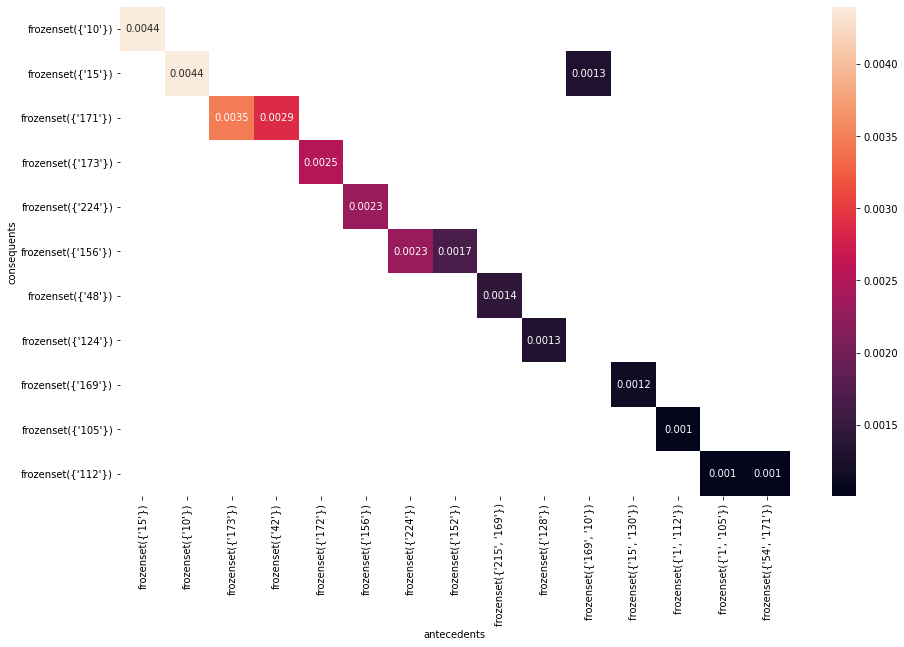

In [41]:
support_table = rules_5.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(15,9))
sns.heatmap(support_table,annot=True)

Heatmap: See association

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

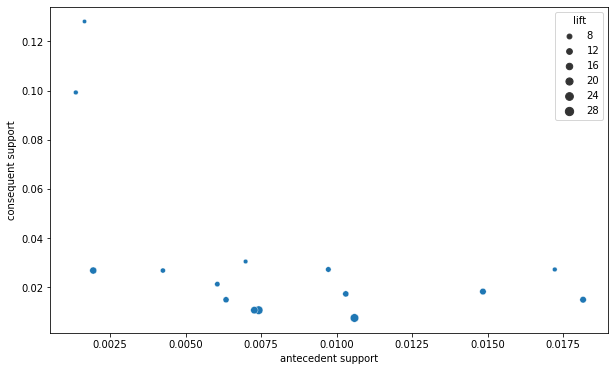

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='antecedent support', y='consequent support', size='lift', data=rules_5)

Scatterplot 


*   Identify natural thresholds of data
*   Use findings to prune



In [43]:
# Converting rules to coordinates
rules_5['antecedents'] = rules_5['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules_5['consequents'] = rules_5['consequents'].apply(lambda consequent: list(consequent)[0])
rules_5['rule'] = rules_5.index

# Define coordinates and label 
coords = rules_5[['antecedents','consequents','rule']]
coords.head()

,antecedents,consequents,rule
552,15,10,552
553,10,15,553
690,173,171,690
834,42,171,834
952,172,173,952


<AxesSubplot:>

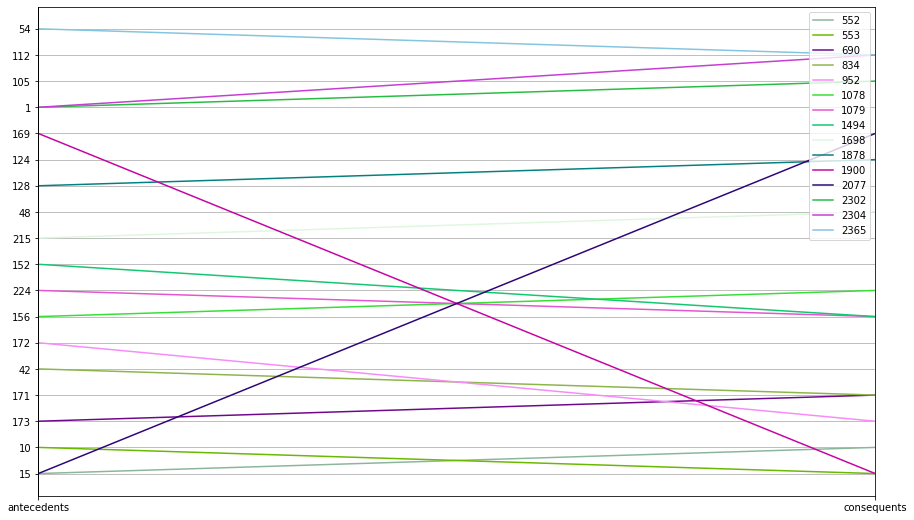

In [44]:
# Generate Parallel coordinates plot
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,9))
parallel_coordinates(coords,'rule')

# MBA - Procedures that are claimed together for a diagnosis

In [49]:
# Combine table of claims with combination of diagnosis with the procedures
sa_table = pd.read_excel('/content/sa_table.xlsx')
procedures_basket = pd.merge(claims_icd, sa_table, on='sacode', how='left')
procedures_basket

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,SA DESCRIPTION,SA CATEGORY
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy,3718,203746_84,CONSULTATION,HOSPITAL BILL
1,203913,40054,261,W55,Contact with other mammals,3747,203913_261,EMERGENCY ROOM,HOSPITAL BILL
2,205599,12286,124,K21,Gastro-esophageal reflux disease,3718,205599_124,CONSULTATION,HOSPITAL BILL
3,205779,43705,277,Z03.0,Observation for suspected tuberculosis,3979,205779_277,RADIOLOGY - XRAY,HOSPITAL BILL
4,205781,43705,277,Z03.0,Observation for suspected tuberculosis,3979,205781_277,RADIOLOGY - XRAY,HOSPITAL BILL
...,...,...,...,...,...,...,...,...,...
185394,653907,10081,104,I10,Essential (primary) hypertension,3718,653907_104,CONSULTATION,HOSPITAL BILL
185395,653946,44709,231,T14.0,Superficial injury of unspecified body region,4092,653946_231,CONSULTATIONS,PROFESSIONAL FEE
185396,653957,32390,229,S83.5,Sprain of cruciate ligament of knee,3718,653957_229,CONSULTATION,HOSPITAL BILL
185397,653969,45838,154,M62.6,Muscle strain,3718,653969_154,CONSULTATION,HOSPITAL BILL
